In [1]:
# Import all required packages

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline
sns.set()

In [2]:
# list of years and months to be used throughout the code
# data available from Jan 2017 to Jul 2018

years = ['2017', '2018']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [3]:
# initialize empty dictonary which will hold 19 cleaned dataframes, Jan 2017 to July 2018
frames = {}

# read all files using pandas
for year in years:
    if year == '2017':
        for month in months:
            path = 'Dataset_export/' + year + month + '.csv'
            df = pd.read_csv(path, low_memory=False)
            frames[year + month] = df
    else:
        for month in months[:7]: # dataset available only for first 7 months of 2018
            path = 'Dataset_export/' + year + month + '.csv'
            df = pd.read_csv(path, low_memory=False)
            frames[year + month] = df

In [4]:
temp = []
for key, value in frames.items():
    temp.append(frames[key])
    frame = pd.concat(temp, ignore_index=True)


In [5]:
def group(x):
     return pd.Series(dict(Delayed = x['DepDel15'].sum(),       # delayed flights 
                           Flights = x['Tail_Number'].count())) # total number of flights

In [11]:
temp = frame.groupby(['Reporting_Airline', 'Origin', 'Dest']).apply(group).reset_index()

In [10]:
airlines = list(frame.Reporting_Airline.unique())

In [13]:
temp.head()

,Reporting_Airline,Origin,Dest,Delayed,Flights
0,9E,ABE,ATL,16,140
1,9E,ABY,ATL,67,438
2,9E,ACK,LGA,12,60
3,9E,AEX,ATL,28,195
4,9E,AGS,ATL,54,382


In [19]:
# pagerank - not possible for multidigraph
# degree centrality
# betweenness centrality

def monthly_performance(G, weight):
    
    #G_Di = DiGraph(G)
    
    page = sorted(nx.pagerank(G, weight=weight).items(), key=lambda x:x[1], reverse=True)[:10]
    deg = sorted(nx.degree_centrality(G).items(), key=lambda x:x[1], reverse=True)[0:10]
    bet = sorted(nx.betweenness_centrality(G, weight=weight).items(), key=lambda x:x[1], reverse=True)[0:10]
    
    return page, deg, bet
    

In [20]:
df = {}
G_dict = {}
pagerank = {}
deg_cent = {}
bet_cent = {}

for key in airlines:

    df[key] = temp.loc[(temp.Reporting_Airline == key)]
    G_dict[key] = nx.from_pandas_edgelist(df[key], source='Origin', target='Dest', 
                                          edge_attr=['Delayed', 'Flights'], 
                                          create_using=nx.DiGraph())
    
    pagerank[key], deg_cent[key], bet_cent[key] = monthly_performance(G_dict[key], weight='Flights')
    
    

In [21]:
df.keys()

dict_keys(['AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'NK', 'OO', 'UA', 'VX', 'WN', '9E', 'G4', 'MQ', 'OH', 'YV', 'YX'])

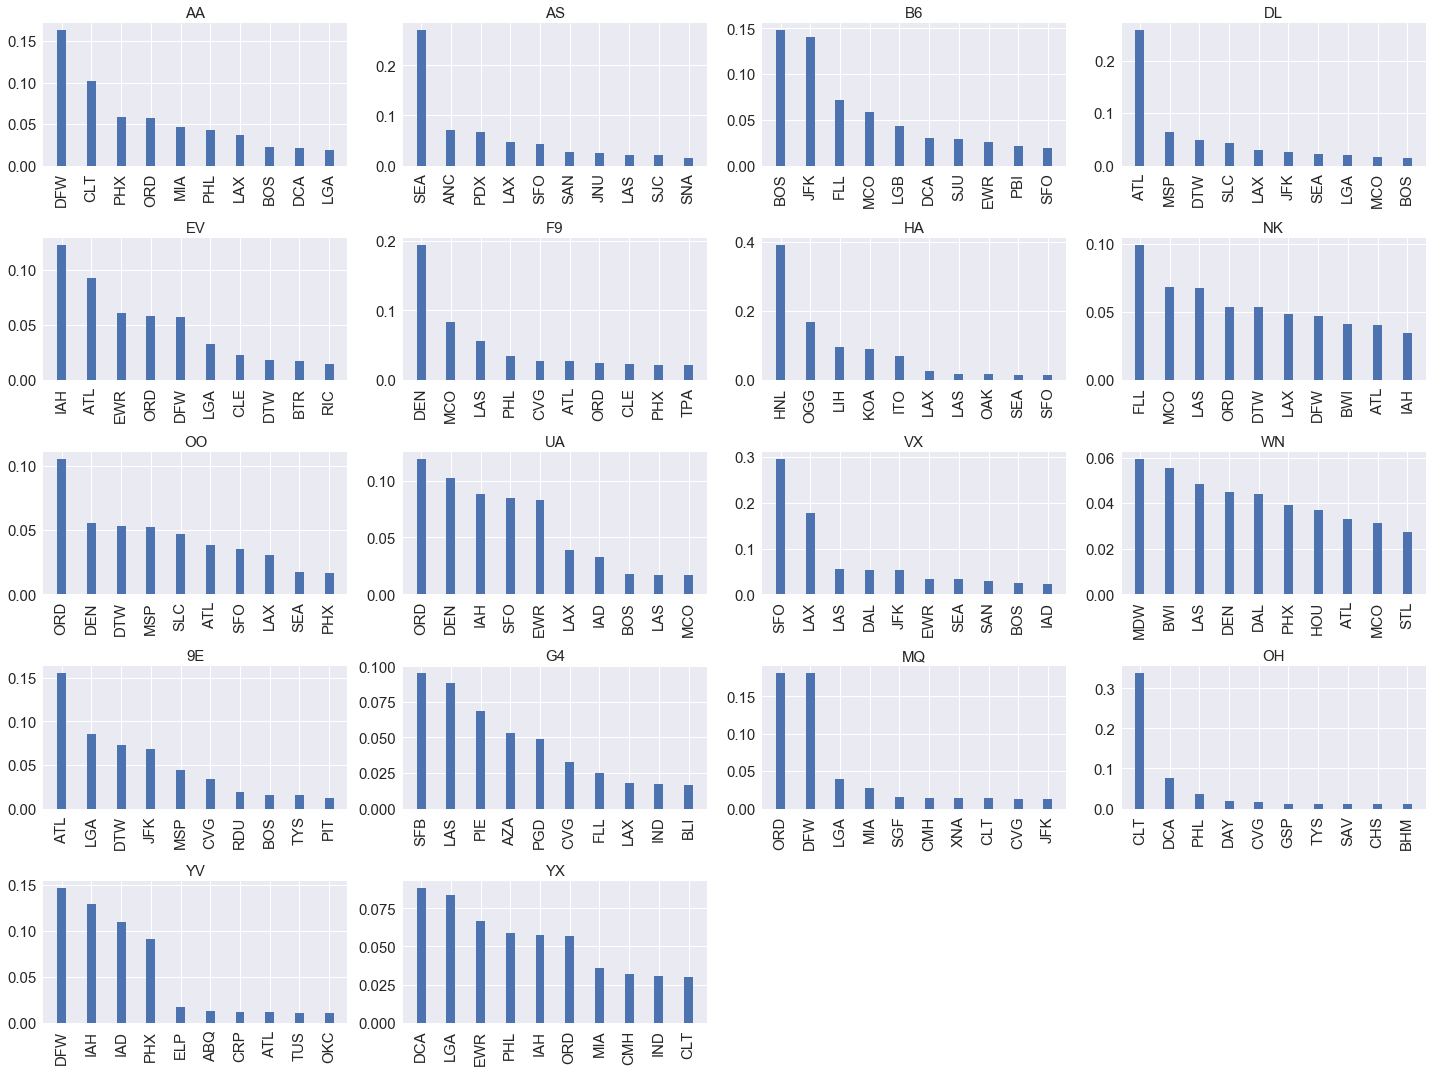

In [33]:
# plot airport pagerank per airlines
plt.figure(figsize=(20, 15), facecolor='white')

# plot numbering starts at 1, not 0
plot_number = 1

for key, value in pagerank.items():
    
    aiports = [x[0] for x in pagerank[key]]
    rank = [x[1] for x in pagerank[key]]
    
    ax = plt.subplot(5, 4, plot_number)
    ax.bar(aiports, rank, width=0.3)
    
    ax.set_title(key, fontdict={'fontsize': 15})
    ax.tick_params(axis='both', which='major', labelsize=15)
    plt.xticks(rotation=90)
    
    
    plot_number = plot_number + 1

plt.tight_layout()

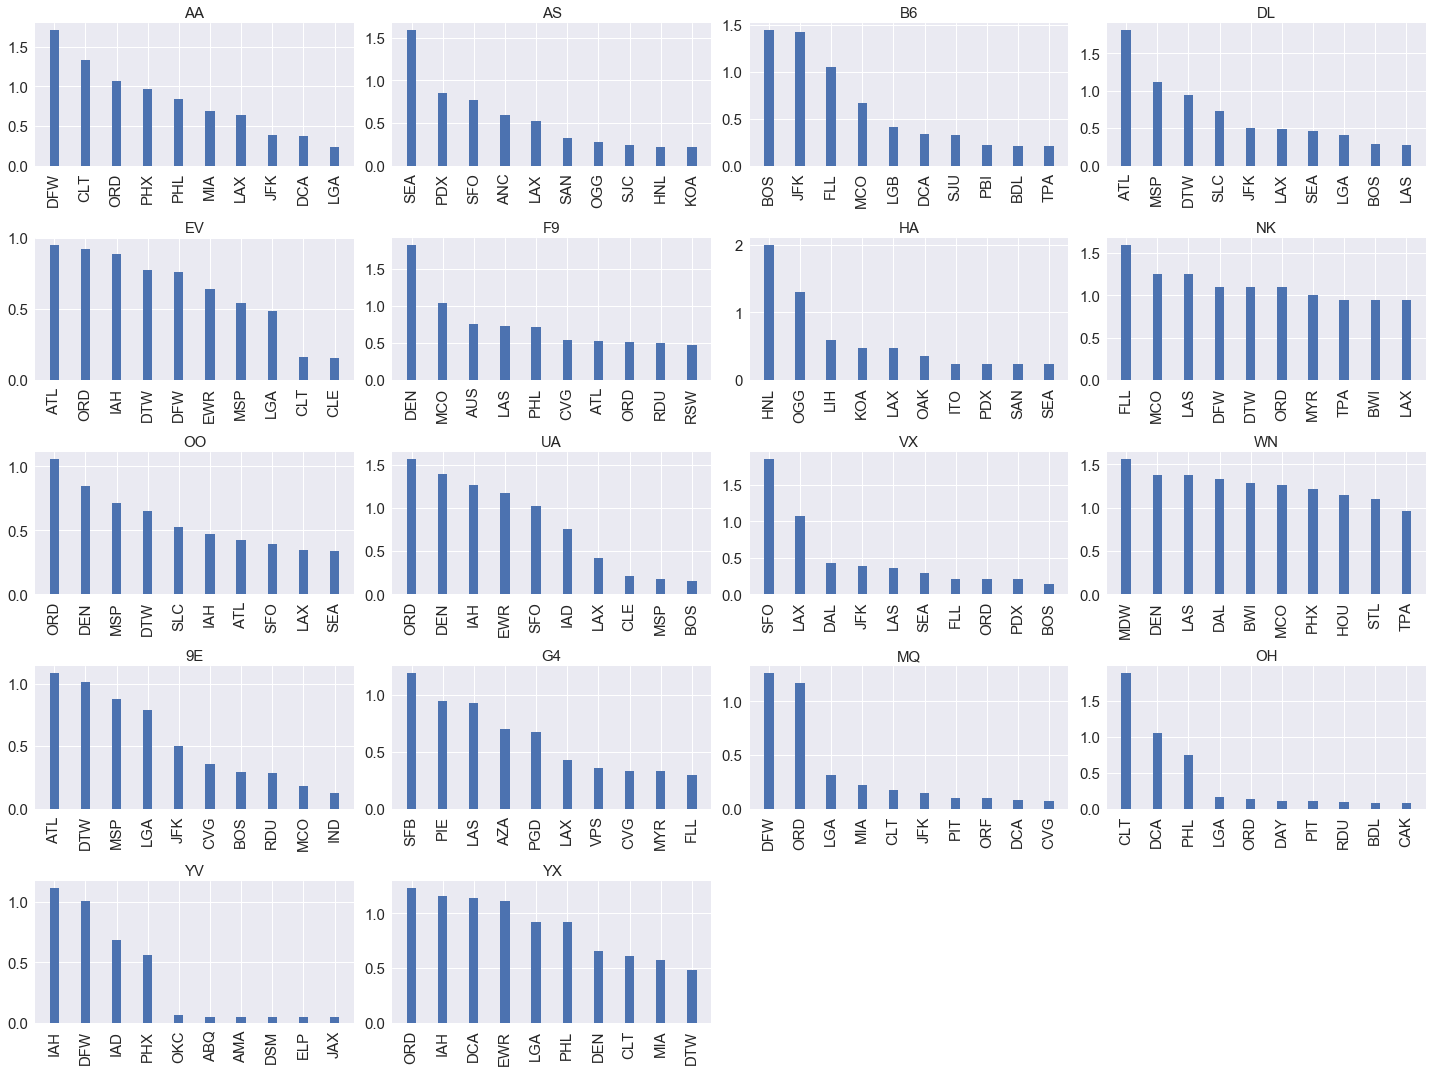

In [32]:
# plot airport degree centrality per airline

plt.figure(figsize=(20, 15), facecolor='white')

# plot numbering starts at 1, not 0
plot_number = 1

for key, value in deg_cent.items():
    
    aiports = [x[0] for x in deg_cent[key]]
    rank = [x[1] for x in deg_cent[key]]
    
    ax = plt.subplot(5, 4, plot_number)
    ax.bar(aiports, rank, width=0.3)
    
    ax.set_title(key, fontdict={'fontsize': 15})
    ax.tick_params(axis='both', which='major', labelsize=15)
    plt.xticks(rotation=90)
    
    
    plot_number = plot_number + 1

plt.tight_layout()

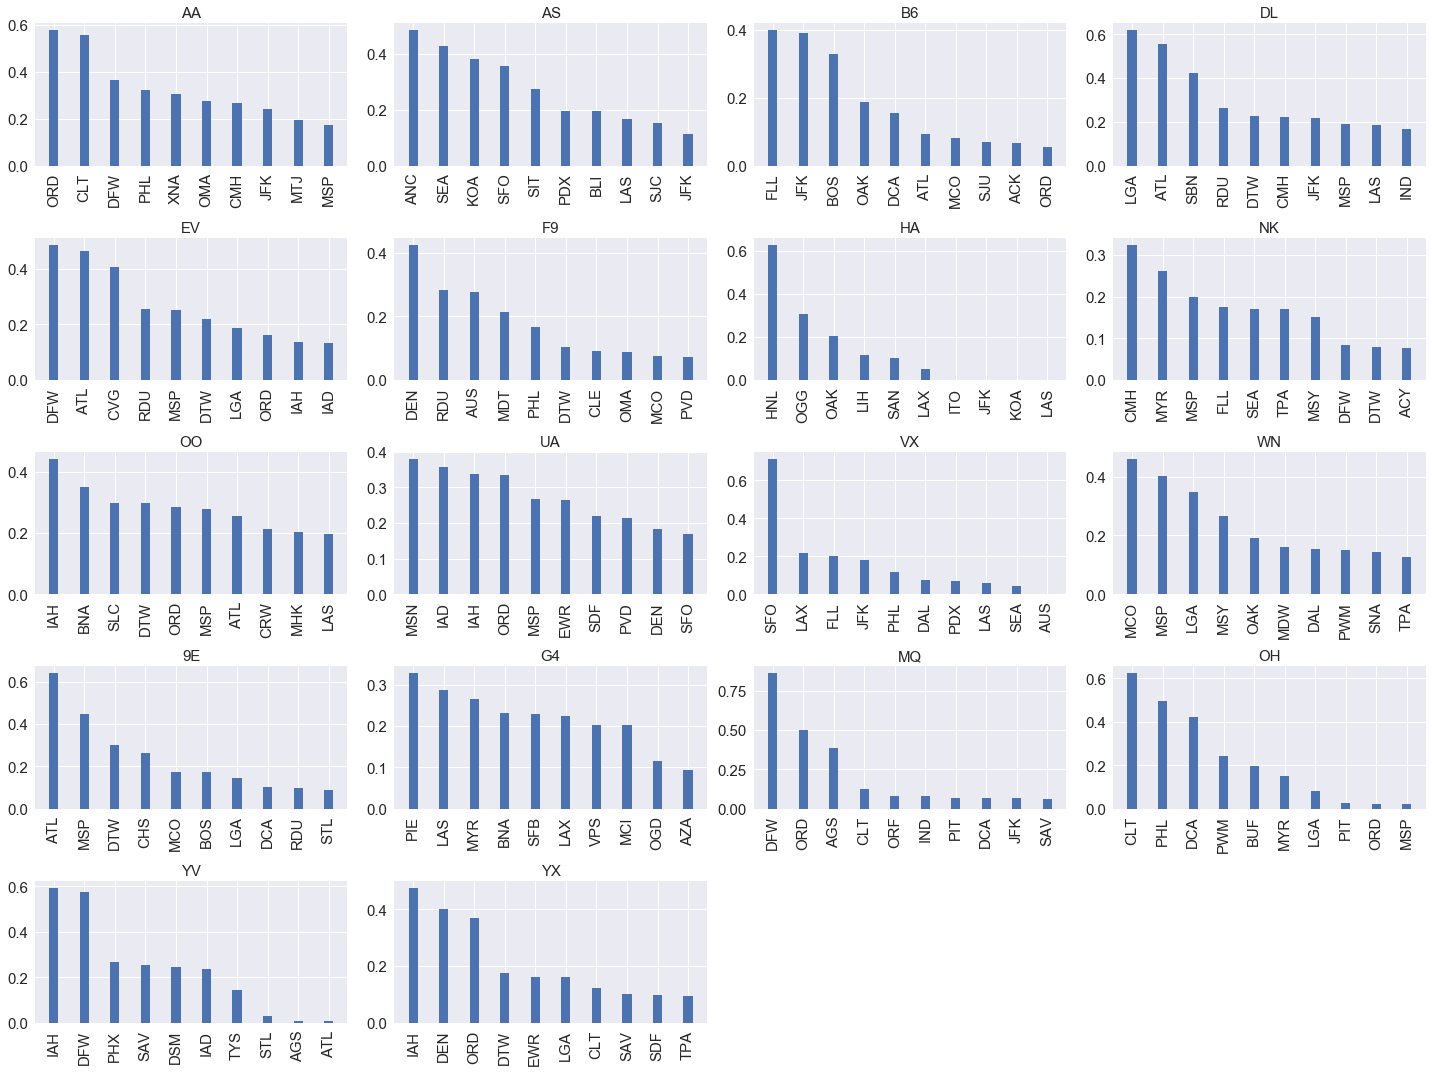

In [31]:
# plot airport betweenness centrality per airline

plt.figure(figsize=(20, 15), facecolor='white')

# plot numbering starts at 1, not 0
plot_number = 1

for key, value in bet_cent.items():
    
    aiports = [x[0] for x in bet_cent[key]]
    rank = [x[1] for x in bet_cent[key]]
    
    ax = plt.subplot(5, 4, plot_number)
    ax.bar(aiports, rank, width=0.3)
    
    ax.set_title(key, fontdict={'fontsize': 15})
    ax.tick_params(axis='both', which='major', labelsize=15)
    plt.xticks(rotation=90)
    
    
    plot_number = plot_number + 1

plt.tight_layout()